### CNN Convolution Task

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 전처리 함수 선언
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# 원-핫 인코딩 변환 함수 선언
def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

# 데이터 세트 분리 함수 선언
def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [2]:
from tensorflow.keras.datasets import mnist

# tensorflow 라이브러리에 내장되어 있는 손글 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

# 데이터 세트 분리 함수를 통해 데이터 세트 분리
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

# 데이터 형태 확인
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [3]:
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 28

# Input Layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# Convolutional Layer
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten()(x)
# Dense Layer (은닉층)
x = Dense(50, activation='relu')(x)
# Dense Layer (출력층)
output = Dense(10, activation='softmax')(x)

# 모델 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       2,163,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,182,576 (8.33 MB)

 Trainable params: 2,182,576 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [5]:
# 훈련
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - acc: 0.9077 - loss: 0.2939 - val_acc: 0.9822 - val_loss: 0.0624
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 123s 156ms/step - acc: 0.9865 - loss: 0.0424 - val_acc: 0.9857 - val_loss: 0.0475
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 117s 156ms/step - acc: 0.9913 - loss: 0.0258 - val_acc: 0.9860 - val_loss: 0.0487
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 157ms/step - acc: 0.9951 - loss: 0.0154 - val_acc: 0.9860 - val_loss: 0.0513
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 117s 156ms/step - acc: 0.9969 - loss: 0.0100 - val_acc: 0.9860 - val_loss: 0.0563
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 117s 156ms/step - acc: 0.9972 - loss: 0.0095 - val_acc: 0.9884 - val_loss: 0.0486
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 157ms/step - acc: 0.9983 - loss: 0.0051 - val_acc: 0.9875 - val_loss: 0.0519
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 118s 157ms/step - acc: 0.9979 - loss: 0.0061 - val_acc: 0.9884 - val_loss: 0.0515
Epoch 9/20
750/750 ━━━━━━━

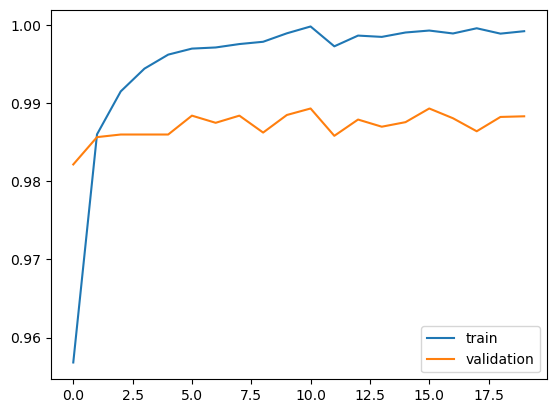

In [6]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [7]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - acc: 0.9826 - loss: 0.1037


[0.080263152718544, 0.9861999750137329]

In [8]:
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

# 입력 데이터 크기 지정
INPUT_SIZE = 28

# Input Layer
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# Convolutional Layer
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)

# Flatten Layer: 2D 텐서를 1D로 평탄화
x = Flatten()(x)
# Dropout을 통해 모델 일반화하여 과적합 방지 (비활성화)
x = Dropout(rate=0.5)(x)
# Dense Layer (은닉층)
x = Dense(50, activation='relu')(x)
# Dense Layer (출력층)
output = Dense(10, activation='softmax')(x)

# 모델 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │       2,163,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,182,576 (8.33 MB)

 Trainable params: 2,182,576 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [10]:
# 훈련
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 149s 178ms/step - acc: 0.9055 - loss: 0.3069 - val_acc: 0.9803 - val_loss: 0.0661
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 134s 178ms/step - acc: 0.9845 - loss: 0.0526 - val_acc: 0.9842 - val_loss: 0.0525
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 132s 176ms/step - acc: 0.9886 - loss: 0.0361 - val_acc: 0.9843 - val_loss: 0.0518
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 177ms/step - acc: 0.9916 - loss: 0.0253 - val_acc: 0.9841 - val_loss: 0.0597
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 177ms/step - acc: 0.9939 - loss: 0.0174 - val_acc: 0.9865 - val_loss: 0.0460
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 177ms/step - acc: 0.9963 - loss: 0.0121 - val_acc: 0.9866 - val_loss: 0.0519
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 177ms/step - acc: 0.9949 - loss: 0.0152 - val_acc: 0.9876 - val_loss: 0.0499
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 177ms/step - acc: 0.9966 - loss: 0.0108 - val_acc: 0.9883 - val_loss: 0.0489
Epoch 9/20
750/750 ━━━━━

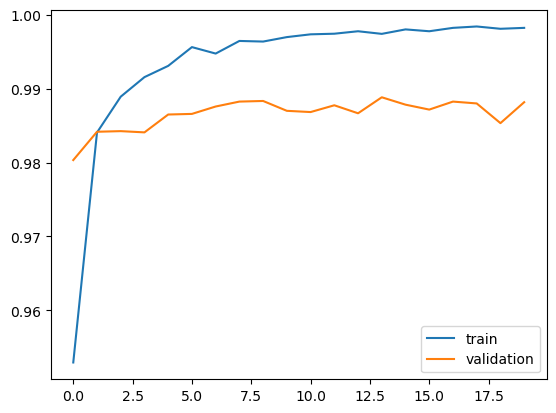

In [11]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [12]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - acc: 0.9837 - loss: 0.0703


[0.05526314675807953, 0.9879000186920166]